In [4]:
# Define task

from _collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
import os

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import normalize
import seaborn as sns
import warnings
from datasets import sf_inputs_discrete

# Scatterplot of parameter sweep

In [5]:
spatial_sigmas = [0.0, 1.0, 2.0, 3.0]
sparsity_range = [[0.001, 0.2], [0.001, 0.1], [0.001, 0.04], [0.001, 0.023]]
spatial_sigmas.extend([
    0.25,
    0.5,
    1.25,
    1.5,
    1.75,
    2.25,
    2.5,
    2.75,
    3.25
    ])
sparsity_range.extend([
    [0.001, 0.19], # 0.25
    [0.001, 0.15], # 0.5
    [0.001, 0.09], # 1.25
    [0.001, 0.05], # 1.5
    [0.001, 0.045], # 1.75
    [0.001, 0.037], # 2.25
    [0.001, 0.03], # 2.5
    [0.001, 0.025], # 2.75
    [0.001, 0.021], # 3.25
    ])

# Calculate T Loss

In [10]:
arena_length = 14
num_states = arena_length**2
num_steps= 3000
dataset = sf_inputs_discrete.Sim2DWalk

In [33]:
sparsities = []
sigmas = []
errs = []
for idx, spatial_sigma in enumerate(spatial_sigmas):
    _range = sparsity_range[idx]
    sparsity_ps = np.linspace(_range[0], _range[1], num=20, endpoint=True)
    for sparsity_p in sparsity_ps:
        for _ in range(3):
            feature_maker_kwargs = {
                'feature_dim': num_states,
                'feature_type': 'correlated_distributed',
                'feature_vals_p': [1-sparsity_p, sparsity_p],
                'spatial_sigma': spatial_sigma,
                'gaussian_truncate': 1.
                }
            dataset_config = {
                'num_steps': num_steps,
                'feature_maker_kwargs': feature_maker_kwargs,
                'num_states': num_states
            }
            dset = dataset(**dataset_config)
            features = dset.feature_maker.feature_map # (features, states)
            dset_inputs = dset.dg_inputs
            r0_inv = np.zeros((features.shape[0], features.shape[0])) #np.linalg.pinv(np.cov(features))
            r1 = np.zeros((features.shape[0], features.shape[0]))
            for t in range(dset_inputs.shape[1]-1):
                r1 += np.outer(dset_inputs[:,t+1], dset_inputs[:,t])
                r0_inv += np.outer(dset_inputs[:,t], dset_inputs[:,t])
            r1 /= t
            r0_inv /= t
            r0_inv = np.linalg.pinv(r0_inv)
            j = r1 @ r0_inv
            for sample in range(30):
                t = np.random.choice(dset_inputs.shape[1]-1)
                err = np.linalg.norm(j@dset_inputs[:,t] - dset_inputs[:,t+1])
                baseline_err = np.linalg.norm(dset_inputs[:,t] - dset_inputs[:,t+1])
                
                sigmas.append(spatial_sigma)
                sparsities.append(dset.feature_maker.post_smooth_sparsity)
                errs.append(err/baseline_err)

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  errs.append(err/baseline_err)
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/358187484.py:40: RuntimeWarning: divide by zero encountered 

In [35]:
sparsities = np.around(sparsities, decimals=2)

In [61]:
x = []
y = []
z = []
for sparsity in np.unique(sparsities):
    for sigma in np.unique(sigmas):
        idxs = np.logical_and(sparsities==sparsity, sigmas==sigma)
        if idxs.size == 0: continue
        errs_idxs = np.array(errs)[idxs]
        errs_idxs = errs_idxs[np.isfinite(errs_idxs)]
        x.append(sparsity)
        y.append(sigma)
        z.append(np.mean(errs_idxs))

In [62]:
df = pd.DataFrame({
    'Sparsity': x,
    'Sigma': y,
    'Distance': z
})

In [63]:
newdf = df.pivot("Sparsity", "Sigma", "Distance")

In [64]:
from matplotlib.colors import LogNorm, Normalize

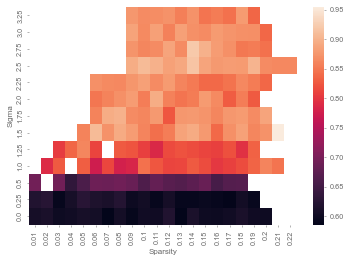

In [70]:
ax = sns.heatmap(newdf.T[::-1])

In [86]:
def make_gradients(
    x_key, y_key, z_key, df,
    cmap="Reds",
    title=None, xlabel=None, ylabel=None,
    figname=None, figsize=[6.4, 4.8],
    interpolate=False, smooth=False, contours=None,
    leave_edge_nans=True, vmin=None, vmax=None,
    cbar_ticks=None, cbar_tick_labels=None
    ):
    
    # Load in data
    xs = df[x_key].to_numpy()
    ys = df[y_key].to_numpy()
    zs = df[z_key].to_numpy()
    
    # Collect data into a meshgrid
    x_list = np.sort(np.unique(xs))
    y_list = np.sort(np.unique(ys))
    dxs = np.around(x_list[1:] - x_list[:-1], decimals=2)
    dys = np.around(y_list[1:] - y_list[:-1], decimals=2)
    if np.unique(dxs).size > 1 or np.unique(dys).size > 1:
        if smooth:
            print("Warning: Smoothing with inconsistent dx/dy")
    x_list = np.concatenate((x_list, [x_list[-1]+dxs[-1]]))
    y_list = np.concatenate((y_list, [y_list[-1]+dys[-1]]))
    x, y = np.meshgrid(x_list, y_list)
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            idx = np.logical_and(
                xs==x[i,j], ys==y[i,j]
                )
            z[i,j] = np.nanmean(zs[idx])
    cmap = plt.get_cmap(cmap)
    cmap.set_bad('yellow')

    # Plot raw grid values
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.pcolormesh(
        x, y, z, cmap=cmap
        )
    fig.colorbar(im, ax=ax)
    plt.show()
    
    # Remove padding used for pcolormesh plot
    x = x[:-1,:-1]
    y = y[:-1,:-1]
    z = z[:-1,:-1]
    
    # Mark NaNs
    nan_mask = np.isnan(z)
    edge_nan_mask = get_edge_nans(z)
    
    # Interpolate to fill in NaN cells
    if interpolate:
        if np.sum(nan_mask) > 0:
            nonnan_mask = np.logical_not(nan_mask)
            nan_indices = np.argwhere(nan_mask)
            data_X = np.vstack(
                [x[nonnan_mask].flatten(),
                 y[nonnan_mask].flatten()]).T
            data_y = z[nonnan_mask].flatten()
            reg = LinearRegression().fit(data_X, data_y)
            interp_vals = reg.predict(
                np.vstack(
                [x[nan_mask].flatten(),
                 y[nan_mask].flatten()]).T
                )
            z[nan_mask] = interp_vals

    
    # Smooth over cells to denoise
    if smooth:
        from astropy.convolution import Gaussian2DKernel
        from astropy.convolution import convolve
        kernel = Gaussian2DKernel(
            x_stddev=1., y_stddev=1.,
            #x_size=3, y_size=3
            )
        z = convolve(z, kernel, preserve_nan=True)
        
    # Generate contour plots
    fig, ax = plt.subplots(figsize=figsize)
    z = np.clip(z, 0, np.inf)
    if vmin is not None and vmax is not None:
        levels = MaxNLocator(nbins=20).tick_values(np.nanmin(vmin), np.nanmax(vmax))
    else:
        levels = MaxNLocator(nbins=20).tick_values(np.nanmin(z), np.nanmax(z))
    cf = ax.contourf(x, y, z,
                     levels=levels, cmap=cmap,
                     vmin=vmin, vmax=vmax, 
                     )
    if leave_edge_nans: # White out parts that were extrapolated
        nans = np.argwhere(edge_nan_mask)
        nan1 = nans[0]; nan2 = nans[-1]
        nan1x = x[nan1[0],nan1[1]]
        nan1y = y[nan1[0],nan1[1]]
        nan2x = x[nan2[0],nan2[1]]
        nan2y = y[nan2[0],nan2[1]]
        max_y = y.max()
        plt.fill(
            [nan1x, nan2x, nan1x],
            [nan1y, nan2y, max_y],
            color='white'
            )
    if contours is not None:
        cntrs = plt.contour(
            x, y, z, contours,
            colors='white', linewidths=0.5
            )
        plt.clabel(cntrs, inline=True)
    cbar = fig.colorbar(cf, ax=ax, ticks=cbar_ticks)
    if cbar_ticks is not None:
        cbar.ax.set_yticklabels(cbar_tick_labels)
    ax.set_title('contourf with levels')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xs.min(), 0.20)
    plt.tight_layout()
    plt.savefig(f'{figname}.png', dpi=300, transparent=True)
    plt.show()
    
    return x, y, z

In [72]:
def get_nan_mask(im, leave_edge_nans=False):
    """ im is processed row-by-row (e.g., sigma by sparsity) """
    
    if not leave_edge_nans:
        return np.isnan(im)
    else:
        mask = np.isnan(im)
        nrows, ncols = im.shape
        for i in range(nrows):
            j = 0
            while np.isnan(im[i,j]) and (j < ncols):
                mask[i,j] = False
                j += 1
        return mask

In [74]:
def get_edge_nans(im):
    """ im is processed row-by-row (e.g., sigma by sparsity) """
    
    mask = np.zeros(im.shape).astype(bool)
    nrows, ncols = im.shape
    for i in range(nrows):
        j = 0
        while np.isnan(im[i,j]) and (j < ncols):
            mask[i,j] = True
            j += 1
    return mask

In [78]:
from sklearn.linear_model import LinearRegression
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/3876732627.py:33: RuntimeWarning: Mean of empty slice
  z[i,j] = np.nanmean(zs[idx])
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/3876732627.py:35: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Purples").copy()
  cmap.set_bad('yellow')
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_32096/3876732627.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


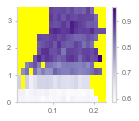

[0.5, 0.6, 1.0]
['', '0.6', '1.0']


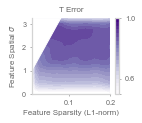

In [93]:
_, _, _ = make_gradients(
    'Sparsity', 'Sigma', 'Distance', df,
    cmap='Purples',
    title='T Error',
    xlabel='Feature Sparsity (L1-norm)',
    ylabel='Feature Spatial $\sigma$',
    figname='../figures/icml_t',
    interpolate=True, smooth=True,
    vmin=0.5, vmax=1,
    cbar_ticks=[0.5, 0.6, 1.],
    cbar_tick_labels=['', '0.6', '1.0'],
    figsize=[2., 1.75]
    )